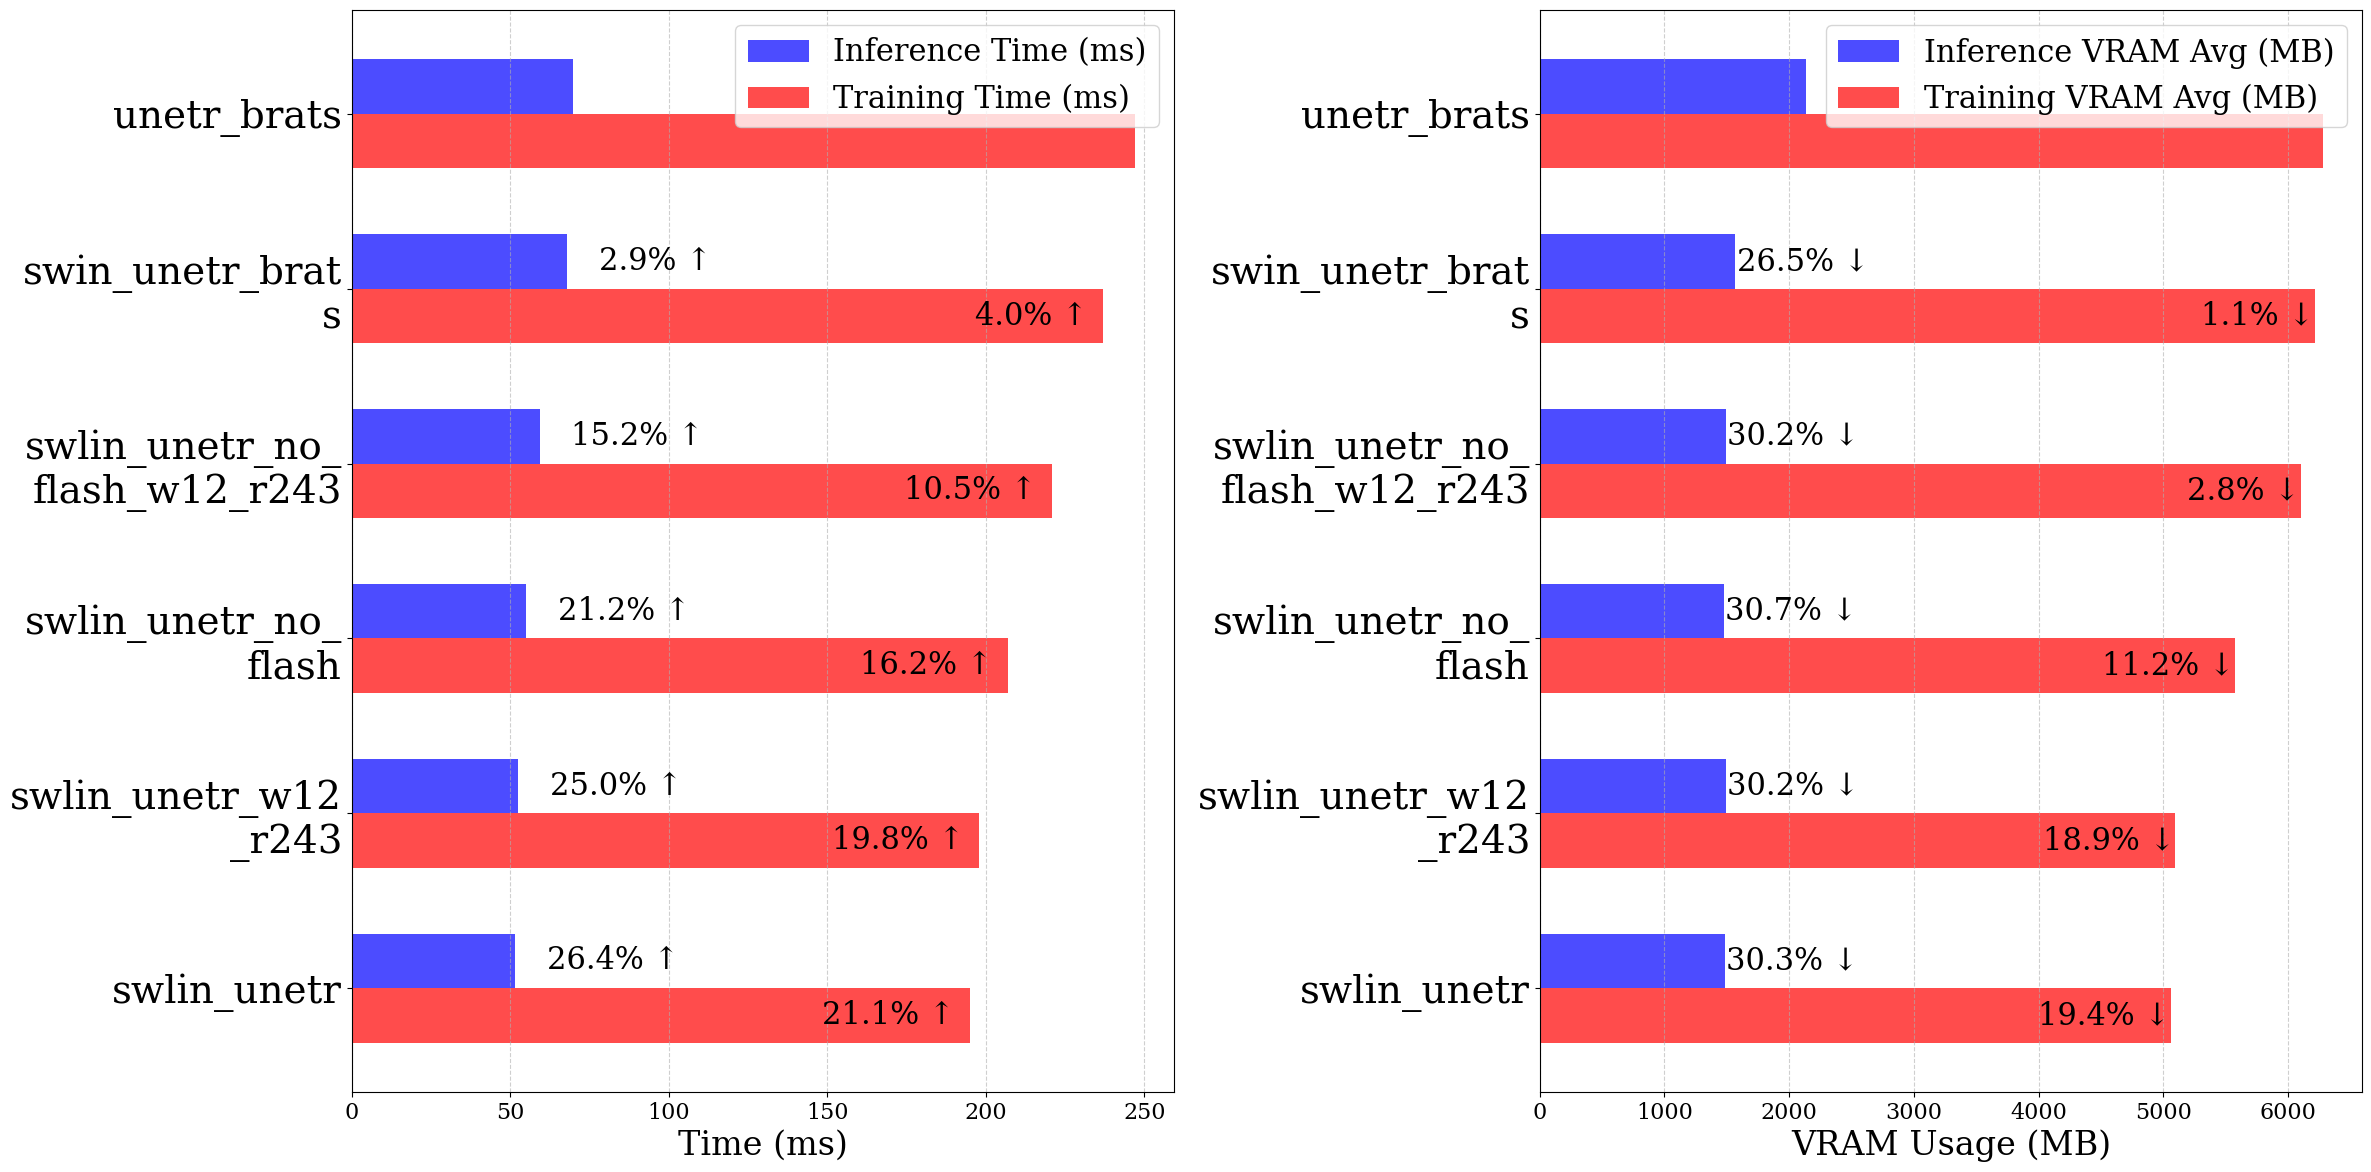

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap  # for wrapping long model names

# Update Matplotlib global settings: use Times New Roman (with fallback) and a base font size
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],
    'font.size': 16  # base font size
})

# Load CSV data
csv_path = "./extra/speed_results.csv"
df = pd.read_csv(csv_path)

# Function to calculate speed improvement percentage (higher is better)
def calculate_speed_improvement(series):
    worst_value = series.max()  # Higher is worse (time taken)
    return ((worst_value - series) / worst_value) * 100

# Function to calculate VRAM reduction percentage (higher is better)
def calculate_vram_reduction(series):
    worst_value = series.max()  # Higher is worse (VRAM usage)
    return ((worst_value - series) / worst_value) * 100

# Compute individual speed improvements
df["Inference Speed Improvement (%)"] = calculate_speed_improvement(df["Inference Time per Step (ms)"])
df["Training Speed Improvement (%)"] = calculate_speed_improvement(df["Training Time per Step (sec)"])

# Compute individual VRAM reductions
df["Inference VRAM Reduction (%)"] = calculate_vram_reduction(df["Inference VRAM Avg (MB)"])
df["Training VRAM Reduction (%)"] = calculate_vram_reduction(df["Training VRAM Avg (MB)"])

# ------------------- SORTING -------------------
# Sort Speed Chart by slowest inference speed improvement
df_speed = df.sort_values(by="Inference Speed Improvement (%)", ascending=True)

# Sort VRAM Chart by lowest training VRAM reduction
df_vram = df.sort_values(by="Training VRAM Reduction (%)", ascending=True)

# ------------------- ADJUST Y-POSITIONS & BAR HEIGHT -------------------
# Reduce spacing between bars by using a smaller spacing factor (e.g., 0.8)
spacing = 0.8
y_speed = np.arange(len(df_speed["Model Name"])) * spacing
y_vram = np.arange(len(df_vram["Model Name"])) * spacing

# Make the bars thinner
bar_height = 0.25

# Wrap long model names to a new line (adjust width as needed)
wrapped_labels_speed = [textwrap.fill(label, width=15) for label in df_speed["Model Name"]]
wrapped_labels_vram = [textwrap.fill(label, width=15) for label in df_vram["Model Name"]]

# ------------------- CREATE SUBPLOTS -------------------
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# ----- Speed Chart on the Left -----
ax0 = axes[0]
bars_inf = ax0.barh(
    y_speed - bar_height/2,
    df_speed["Inference Time per Step (ms)"],
    height=bar_height,
    color="blue",
    alpha=0.7,
    label="Inference Time (ms)"
)
bars_train = ax0.barh(
    y_speed + bar_height/2,
    df_speed["Training Time per Step (sec)"] * 1000,  # convert sec to ms
    height=bar_height,
    color="red",
    alpha=0.7,
    label="Training Time (ms)"
)

ax0.set_xlabel("Time (ms)", fontsize=24)
# Title commented out
# ax0.set_title("Model Inference & Training Speed Comparison\n(Sorted by Slowest Inference Speed Improvement)", fontsize=20)
ax0.set_yticks(y_speed)
ax0.set_yticklabels(wrapped_labels_speed, fontsize=28)
ax0.legend(fontsize=22)
ax0.grid(axis="x", linestyle="--", alpha=0.6)
ax0.invert_yaxis()  # Worst-performing at the top

# Add percentage labels for each bar (skip worst-performing model at index 0)
for i, (rect_inf, rect_train, perc_inf, perc_train) in enumerate(zip(
    bars_inf,
    bars_train,
    df_speed["Inference Speed Improvement (%)"],
    df_speed["Training Speed Improvement (%)"]
)):
    if i != 0:
        # Inference bar: label on the right with offset +10 (outside the bar)
        ax0.text(
            rect_inf.get_width() + 10,
            rect_inf.get_y() + rect_inf.get_height() / 2,
            f"{perc_inf:.1f}% ↑",
            va="center",
            fontsize=22,
            color="black"
        )
        # Training bar: label on the right inside the bar using an offset (-5 from bar's edge)
        ax0.text(
            rect_train.get_width() - 5,
            rect_train.get_y() + rect_train.get_height() / 2,
            f"{perc_train:.1f}% ↑",
            va="center",
            ha="right",
            fontsize=22,
            color="black"
        )

# ----- VRAM Chart on the Right -----
ax1 = axes[1]
bars_inf_vram = ax1.barh(
    y_vram - bar_height/2,
    df_vram["Inference VRAM Avg (MB)"],
    height=bar_height,
    color="blue",
    alpha=0.7,
    label="Inference VRAM Avg (MB)"
)
bars_train_vram = ax1.barh(
    y_vram + bar_height/2,
    df_vram["Training VRAM Avg (MB)"],
    height=bar_height,
    color="red",
    alpha=0.7,
    label="Training VRAM Avg (MB)"
)

ax1.set_xlabel("VRAM Usage (MB)", fontsize=24)
# Title commented out
# ax1.set_title("Model VRAM Consumption Comparison\n(Sorted by Lowest Inference VRAM Reduction)", fontsize=20)
ax1.set_yticks(y_vram)
ax1.set_yticklabels(wrapped_labels_vram, fontsize=28)
ax1.legend(fontsize=22)
ax1.grid(axis="x", linestyle="--", alpha=0.6)
ax1.invert_yaxis()

# Add VRAM reduction percentage labels for each bar (skip worst-performing model at index 0)
for i, (rect_inf_vram, rect_train_vram, perc_inf_vram, perc_train_vram) in enumerate(zip(
    bars_inf_vram,
    bars_train_vram,
    df_vram["Inference VRAM Reduction (%)"],
    df_vram["Training VRAM Reduction (%)"]
)):
    if i != 0:
        # Inference bar: label on the right with offset +10 (outside the bar)
        ax1.text(
            rect_inf_vram.get_width() + 10,
            rect_inf_vram.get_y() + rect_inf_vram.get_height() / 2,
            f"{perc_inf_vram:.1f}% ↓",
            va="center",
            fontsize=22,
            color="black"
        )
        # Training bar: label on the right inside the bar using an offset (-5 from bar's edge)
        ax1.text(
            rect_train_vram.get_width() - 5,
            rect_train_vram.get_y() + rect_train_vram.get_height() / 2,
            f"{perc_train_vram:.1f}% ↓",
            va="center",
            ha="right",
            fontsize=22,
            color="black"
        )

# Adjust layout for neat spacing between subplots
plt.tight_layout()

# Export the combined figure as a PDF
plt.savefig("combined_chart.pdf", format="pdf")
plt.show()


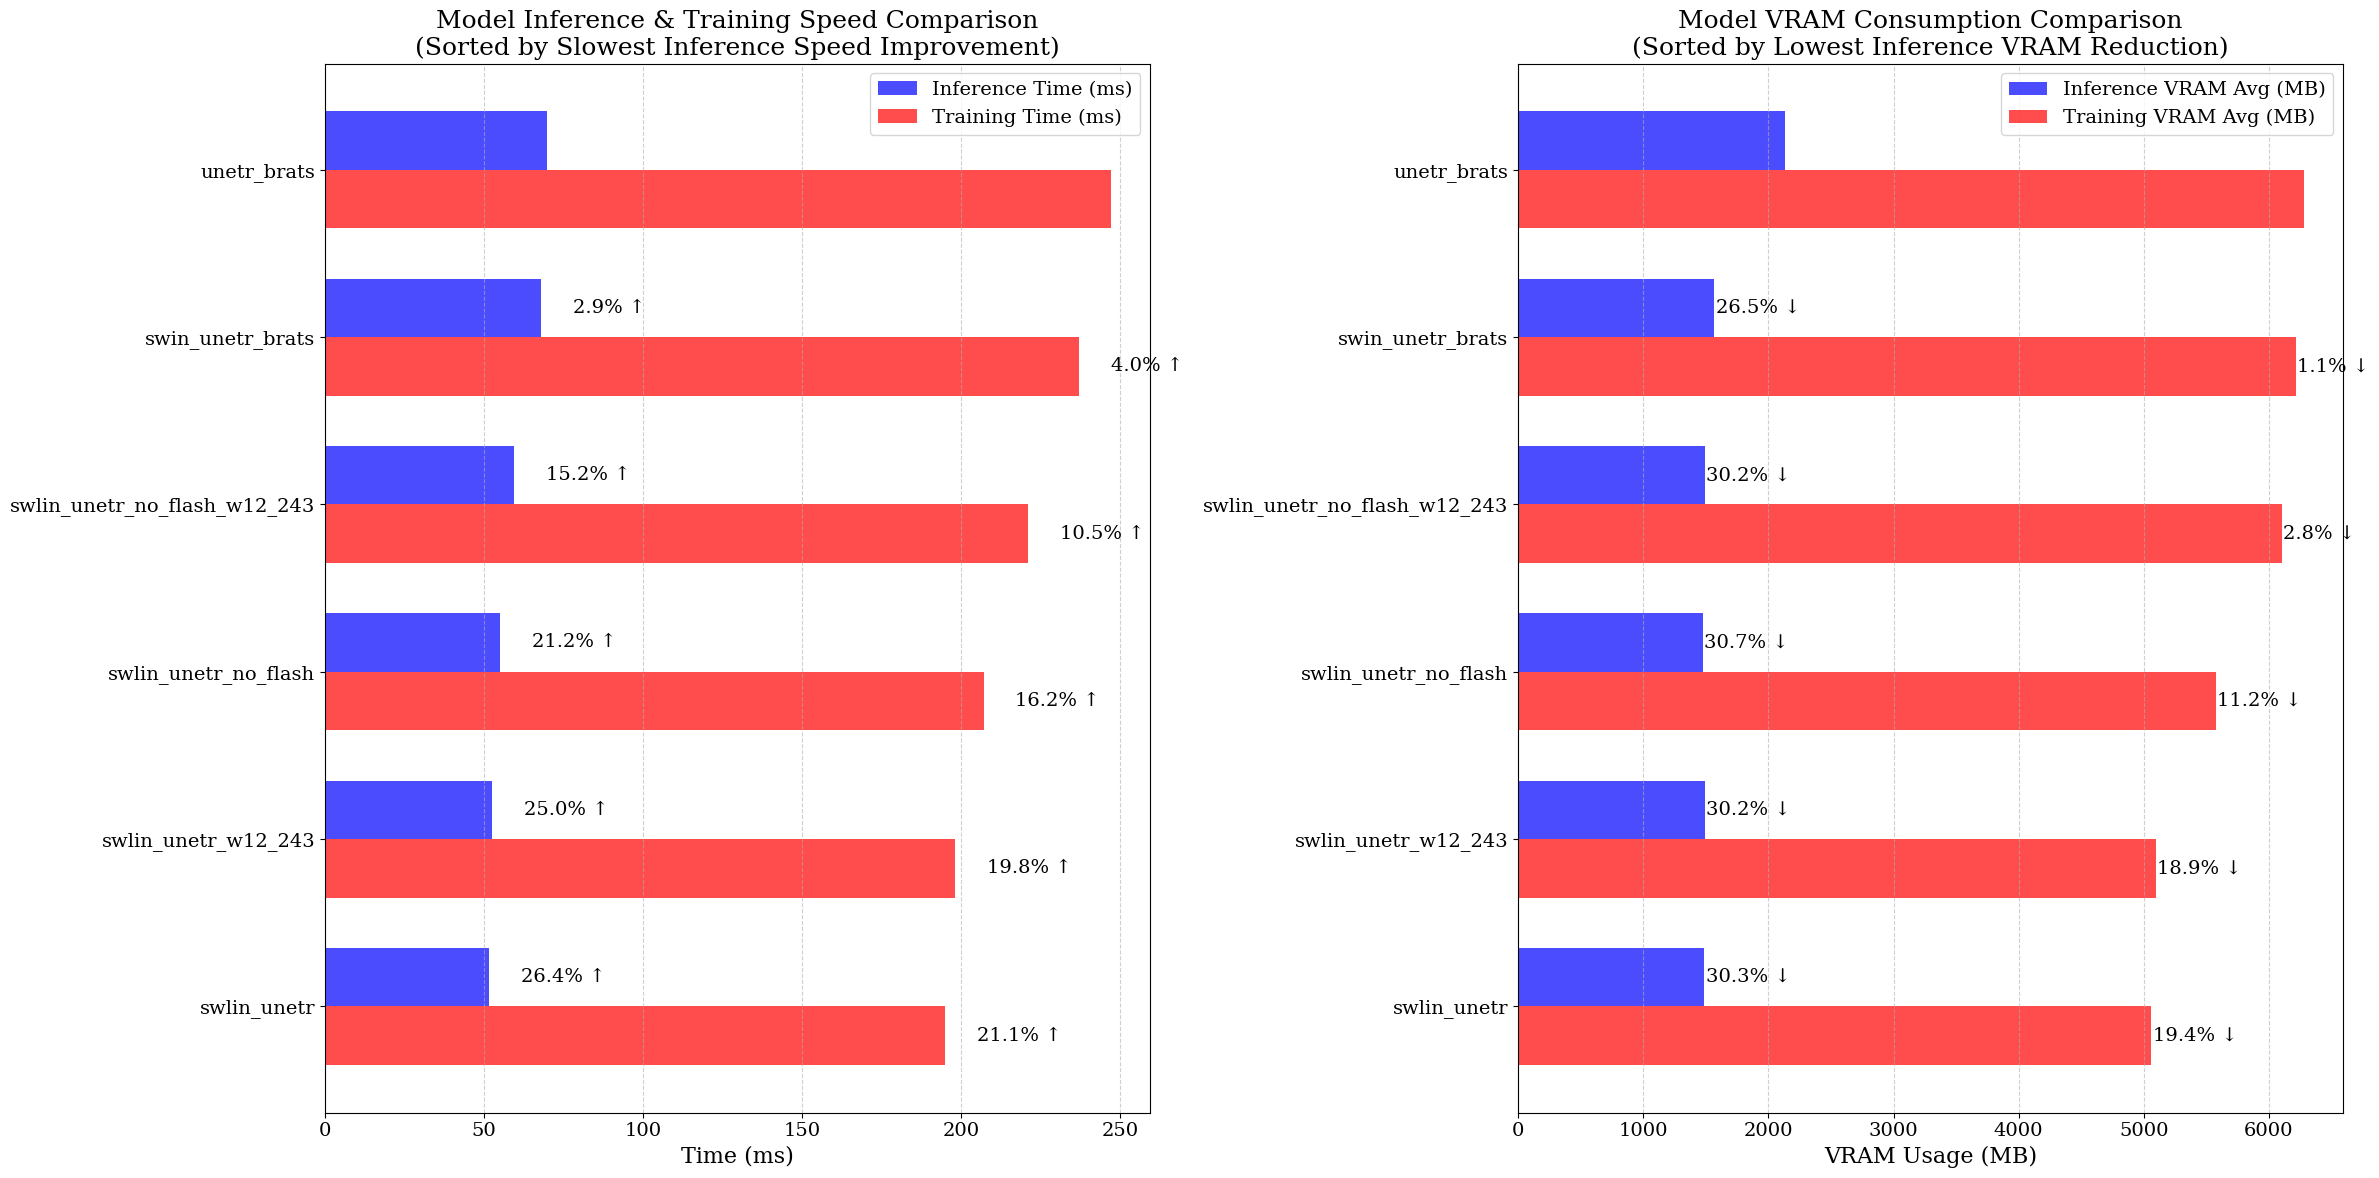

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Update Matplotlib global settings: use Times New Roman and increase font size
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'DejaVu Serif'],  # Fallback to DejaVu Serif if needed
    'font.size': 14
})

# Load CSV data
csv_path = "./extra/speed_results.csv"
df = pd.read_csv(csv_path)

# Function to calculate speed improvement percentage (higher is better)
def calculate_speed_improvement(series):
    worst_value = series.max()  # Higher is worse (time taken)
    return ((worst_value - series) / worst_value) * 100

# Function to calculate VRAM reduction percentage (higher is better)
def calculate_vram_reduction(series):
    worst_value = series.max()  # Higher is worse (VRAM usage)
    return ((worst_value - series) / worst_value) * 100

# Compute individual speed improvements
df["Inference Speed Improvement (%)"] = calculate_speed_improvement(df["Inference Time per Step (ms)"])
df["Training Speed Improvement (%)"] = calculate_speed_improvement(df["Training Time per Step (sec)"])

# Compute individual VRAM reductions
df["Inference VRAM Reduction (%)"] = calculate_vram_reduction(df["Inference VRAM Avg (MB)"])
df["Training VRAM Reduction (%)"] = calculate_vram_reduction(df["Training VRAM Avg (MB)"])

# ------------------- SORTING -------------------
# Sort Speed Chart by slowest inference speed improvement
df_speed = df.sort_values(by="Inference Speed Improvement (%)", ascending=True)

# Sort VRAM Chart by lowest training VRAM reduction
df_vram = df.sort_values(by="Training VRAM Reduction (%)", ascending=True)

# Create y positions for each model in the two charts
y_speed = np.arange(len(df_speed["Model Name"]))
y_vram = np.arange(len(df_vram["Model Name"]))
bar_height = 0.35

# ------------------- CREATE SUBPLOTS -------------------
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# ----- Speed Chart on the Left -----
ax0 = axes[0]
bars_inf = ax0.barh(y_speed - bar_height/2,
                    df_speed["Inference Time per Step (ms)"],
                    height=bar_height,
                    color="blue",
                    alpha=0.7,
                    label="Inference Time (ms)")
bars_train = ax0.barh(y_speed + bar_height/2,
                      df_speed["Training Time per Step (sec)"] * 1000,  # convert sec to ms
                      height=bar_height,
                      color="red",
                      alpha=0.7,
                      label="Training Time (ms)")

ax0.set_xlabel("Time (ms)", fontsize=16)
ax0.set_title("Model Inference & Training Speed Comparison\n(Sorted by Slowest Inference Speed Improvement)", fontsize=18)
ax0.set_yticks(y_speed)
ax0.set_yticklabels(df_speed["Model Name"], fontsize=14)
ax0.legend(fontsize=14)
ax0.grid(axis="x", linestyle="--", alpha=0.6)
ax0.invert_yaxis()  # Worst-performing at the top

# Add percentage labels for each bar (skip worst-performing model at index 0)
for i, (rect_inf, rect_train, perc_inf, perc_train) in enumerate(zip(
    bars_inf,
    bars_train,
    df_speed["Inference Speed Improvement (%)"],
    df_speed["Training Speed Improvement (%)"]
)):
    if i != 0:
        ax0.text(rect_inf.get_width() + 10,
                 rect_inf.get_y() + rect_inf.get_height() / 2,
                 f"{perc_inf:.1f}% ↑",
                 va="center", fontsize=14, color="black")
        ax0.text(rect_train.get_x() + rect_train.get_width() + 10,
                 rect_train.get_y() + rect_train.get_height() / 2,
                 f"{perc_train:.1f}% ↑",
                 va="center", fontsize=14, color="black")

# ----- VRAM Chart on the Right -----
ax1 = axes[1]
bars_inf_vram = ax1.barh(y_vram - bar_height/2,
                         df_vram["Inference VRAM Avg (MB)"],
                         height=bar_height,
                         color="blue",
                         alpha=0.7,
                         label="Inference VRAM Avg (MB)")
bars_train_vram = ax1.barh(y_vram + bar_height/2,
                           df_vram["Training VRAM Avg (MB)"],
                           height=bar_height,
                           color="red",
                           alpha=0.7,
                           label="Training VRAM Avg (MB)")

ax1.set_xlabel("VRAM Usage (MB)", fontsize=16)
ax1.set_title("Model VRAM Consumption Comparison\n(Sorted by Lowest Inference VRAM Reduction)", fontsize=18)
ax1.set_yticks(y_vram)
ax1.set_yticklabels(df_vram["Model Name"], fontsize=14)
ax1.legend(fontsize=14)
ax1.grid(axis="x", linestyle="--", alpha=0.6)
ax1.invert_yaxis()

# Add VRAM reduction percentage labels for each bar (skip worst-performing model at index 0)
for i, (rect_inf_vram, rect_train_vram, perc_inf_vram, perc_train_vram) in enumerate(zip(
    bars_inf_vram,
    bars_train_vram,
    df_vram["Inference VRAM Reduction (%)"],
    df_vram["Training VRAM Reduction (%)"]
)):
    if i != 0:
        ax1.text(rect_inf_vram.get_width() + 10,
                 rect_inf_vram.get_y() + rect_inf_vram.get_height() / 2,
                 f"{perc_inf_vram:.1f}% ↓",
                 va="center", fontsize=14, color="black")
        ax1.text(rect_train_vram.get_x() + rect_train_vram.get_width() + 10,
                 rect_train_vram.get_y() + rect_train_vram.get_height() / 2,
                 f"{perc_train_vram:.1f}% ↓",
                 va="center", fontsize=14, color="black")

# Adjust layout for neat spacing
plt.tight_layout()

# Export the combined figure as a PDF
plt.savefig("combined_chart.pdf", format="pdf")

plt.show()
